In [134]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,precision_score
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


print('Libraries Imported')

Libraries Imported


In [135]:
#importing the dataset
dataset = pd.read_csv('dataset.csv')

dataset.columns = ['window', 'mean','median','std','iqr','s_index','out']

print('Shape of the dataset: ' + str(dataset.shape))

print(dataset.head())

dataset.describe()


Shape of the dataset: (8000, 7)
    window    mean  median         std      iqr  s_index  out
0  window0  306.03   297.9  115.158153  170.800        0  DUP
1  window1  305.26   315.3  118.049034  182.275      100  DUP
2  window2  300.61   301.1  109.083189  162.475      200  DUP
3  window3  314.00   307.3  108.027506  166.225      300  DUP
4  window4  309.24   315.1  114.686093  185.750      400  DUP


,mean,median,std,iqr,s_index
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,24.104341,24.096644,2.408060,3.748972,399950.000000
std,34.979926,34.921010,13.159218,20.067843,230954.540982
min,3.500000,3.300000,0.611215,0.650000,0.000000
25%,19.940000,19.900000,0.745111,1.150000,199975.000000
50%,20.000000,20.000000,0.769497,1.250000,399950.000000
75%,20.060000,20.100000,0.793211,1.375000,599925.000000
max,336.520000,337.500000,119.648365,202.325000,799900.000000


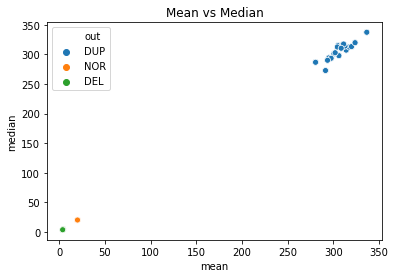

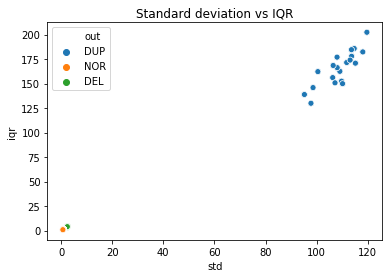

In [136]:
#scatter plot
sns.scatterplot(x = 'mean', y = 'median', data = dataset, hue = 'out')
plt.title('Mean vs Median')
plt.show()

sns.scatterplot(x = 'std', y = 'iqr', data = dataset, hue = 'out')
plt.title('Standard deviation vs IQR')
plt.show()

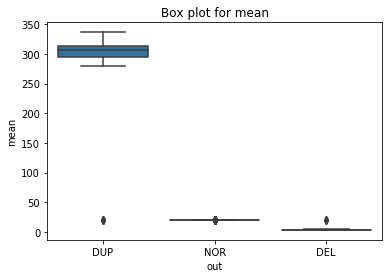

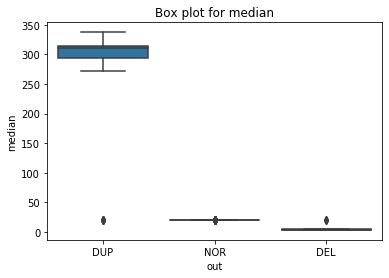

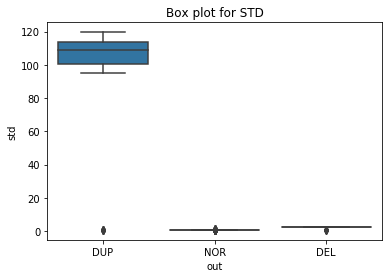

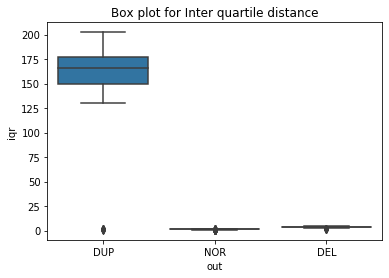

In [137]:
#box plots
sns.boxplot(x = "out", y = "mean", data = dataset)
plt.title("Box plot for mean")
plt.show()


sns.boxplot(x = "out", y = "median", data = dataset)
plt.title("Box plot for median")
plt.show()


sns.boxplot(x = "out", y = "std", data = dataset)
plt.title("Box plot for STD")
plt.show()

sns.boxplot(x = "out", y = "iqr", data = dataset)
plt.title("Box plot for Inter quartile distance")
plt.show()

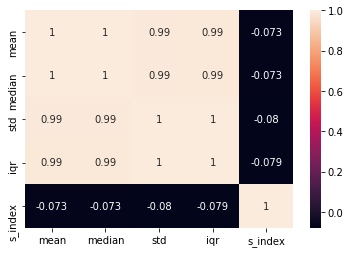

In [138]:
#Correlation heat map

no_id_data = dataset.copy()
sns.heatmap(data = no_id_data.corr(), annot = True)
plt.show()

In [139]:
#Creating the dependent variable class
factor = pd.factorize(dataset['out'])
dataset.out = factor[0]
definitions = factor[1]
print(dataset.out.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: out, dtype: int64
Index(['DUP', 'NOR', 'DEL'], dtype='object')


In [140]:
#Splitting the data into independent and dependent variables

#excuding start_index and window name
X = dataset.iloc[:,1:5].values

y = dataset.iloc[:,6].values
print('The independent features set: ')
print(X[:2,:])
print('The dependent variable: ')
print(y[:2])

The independent features set: 
[[306.03       297.9        115.1581534  170.8       ]
 [305.26       315.3        118.04903383 182.275     ]]
The dependent variable: 
[0 0]


In [141]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)


In [142]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

In [144]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to DUP, NOR, DEL
reversefactor = dict(zip(range(3),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print('-----------------Confusion Matrix ---------------------------')
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

-----------------Confusion Matrix ---------------------------
Predicted  DEL  DUP   NOR
Actual                   
DEL         31    0     1
DUP          0   16     1
NOR          0    1  1950


In [145]:
CR_RF = classification_report(y_test,y_pred)
print("---------------------Classification Report--------------------\n",CR_RF)

---------------------Classification Report--------------------
               precision    recall  f1-score   support

         DEL       1.00      0.97      0.98        32
         DUP       0.94      0.94      0.94        17
         NOR       1.00      1.00      1.00      1951

    accuracy                           1.00      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       1.00      1.00      1.00      2000

